In [1]:
import tensorflow as tf
import numpy as np

In [2]:
working_dir = '/Users/ndjido/Documents/Davidson_Consulting/TF_DL_Meetup/Demo/LM/'

## >> Simulating Data For Linear Model

In [3]:
sample_size = 1000
a = np.pi
b = 7
x_data = np.random.randn(sample_size)
noise = [n * np.random.normal(0.0, 0.5) for n in np.ones(sample_size)]
y_data = (a * x_data) + (np.ones(sample_size) * b) + noise

In [4]:
%matplotlib inline

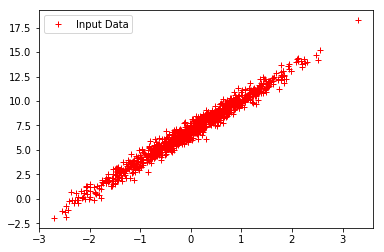

In [5]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'r+', label = "Input Data")
plt.legend()
plt.show()

## >> Building LM with TF

/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


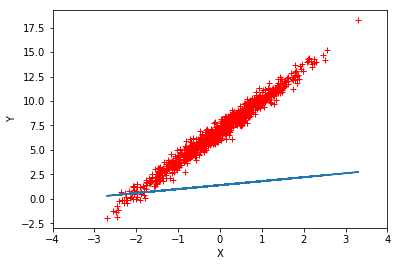

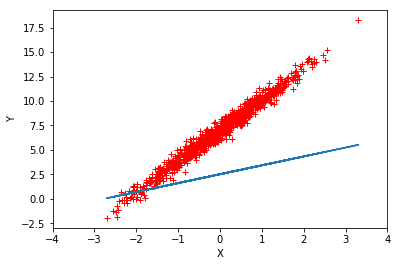

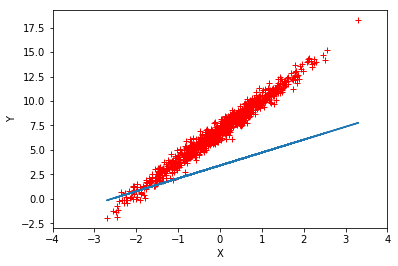

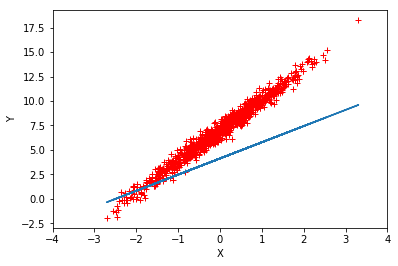

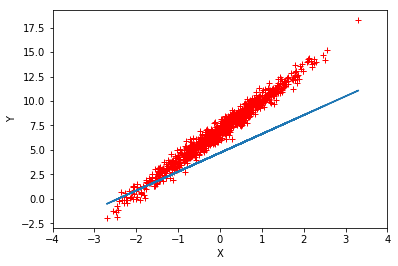

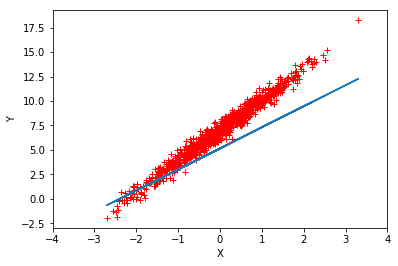

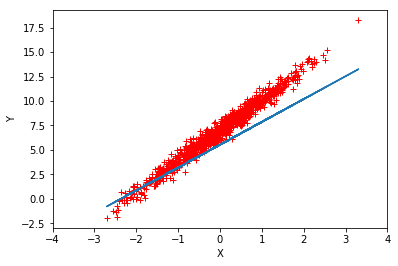

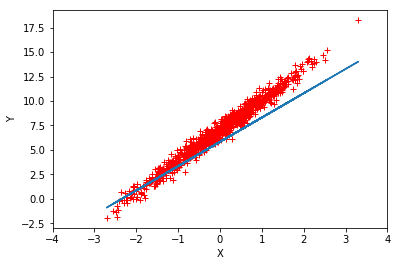

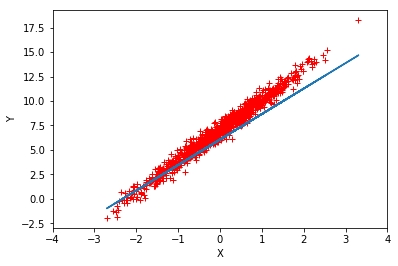

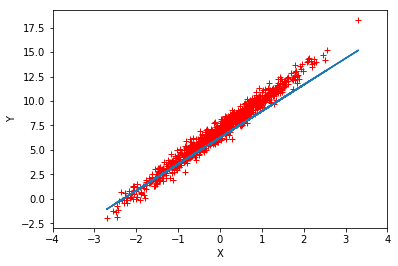

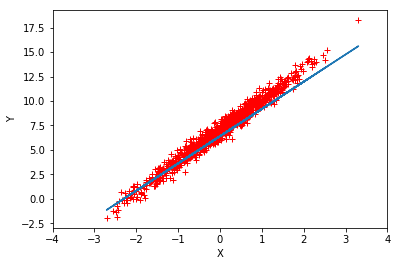

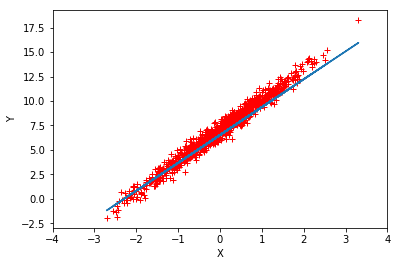

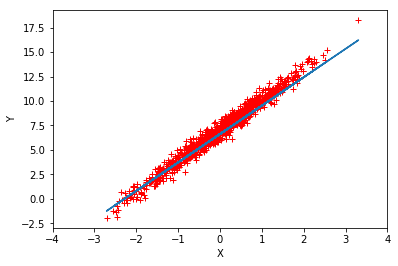

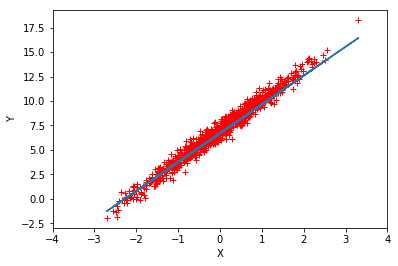

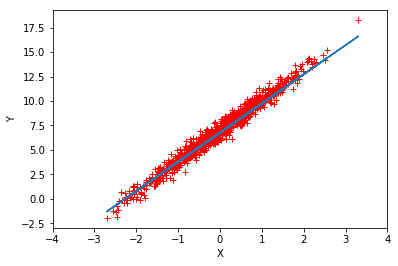

In [6]:
with tf.name_scope('Model'):
    W = tf.Variable(np.random.normal(0.0, 1), name="W")
    b = tf.Variable(tf.zeros([1]), name='b')
    y_model = tf.multiply(W, x_data) + b

with tf.name_scope('training'):
    loss_func = tf.reduce_mean(tf.square(y_model - y_data))
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    trainer = optimizer.minimize(loss_func)

nb_iterations = 15

merged_summary = tf.summary.merge_all()


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(working_dir + 'summary', sess.graph)

    for i in range(nb_iterations):
        sess.run(trainer)
        y_estimated = sess.run(W) * x_data + sess.run(b)
        plt.plot(x_data, y_data, 'r+')
        plt.plot(x_data, y_estimated)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.xlim(-4, 4)
        plt.legend()
        plt.show()
